In [1]:
from games.mp import MP
from agents.regretmatching_t import RegretMatching
from agents.fictitiousplay_t import FictitiousPlay	
from agents.random_agent import RandomAgent

In [2]:
g = MP()
g.reset()

In [3]:
rm = dict(map(lambda agent: (agent, RegretMatching(game=g, agent=agent)), g.agents))

In [4]:
for i in range(10):
    actions = dict(map(lambda agent: (agent, rm[agent].action()), g.agents))
    g.step(actions)

In [5]:
dict(map(lambda agent: (agent, rm[agent].policy()), g.agents))

{'agent_0': array([0.45, 0.55]), 'agent_1': array([0.3, 0.7])}

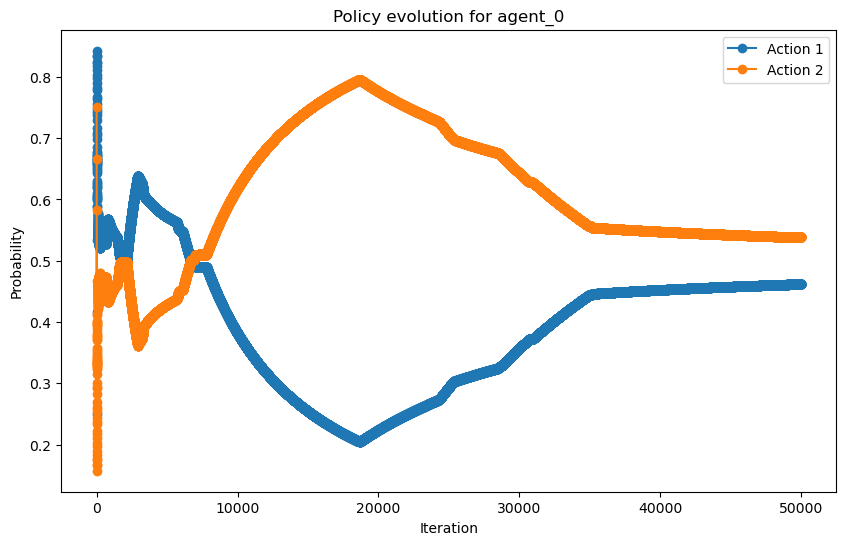

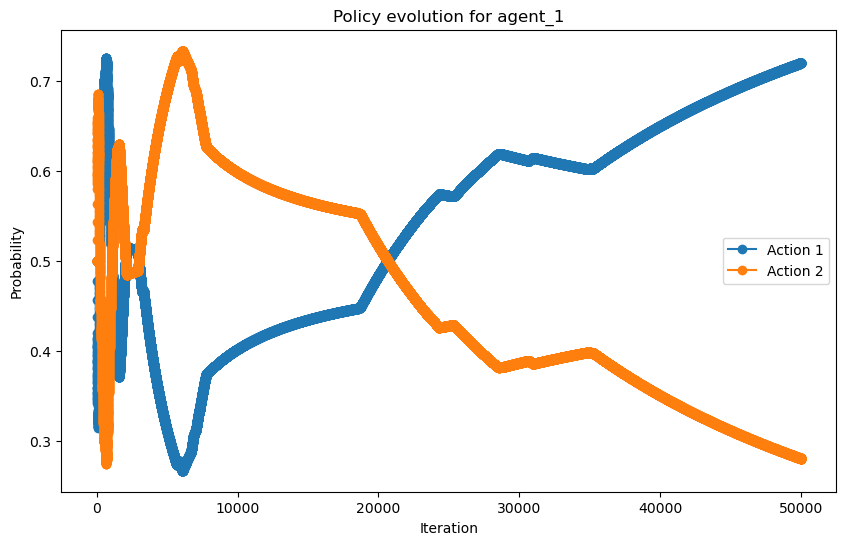

In [6]:
import matplotlib.pyplot as plt
import numpy as np

agents = g.agents
game = g
num_iterations = 50000
rm_agents = {agent: RegretMatching(game=game, agent=agent) for agent in agents}

policies = {agent: [] for agent in agents}
for _ in range(num_iterations):
    # Elegir acciones de los agentes
    actions = {agent: rm_agents[agent].action() for agent in agents}
    
    # Ejecutar un paso en el entorno
    game.step(actions)
    
    # Guardar la política aprendida en cada iteración
    for agent in agents:
        policies[agent].append(rm_agents[agent].policy().copy())

# Convertir las listas en arrays de NumPy para facilitar la manipulación
for agent in policies:
    policies[agent] = np.array(policies[agent])


# Graficar la evolución de las políticas de cada agente
for agent, policy_matrix in policies.items():
    plt.figure(figsize=(10, 6))

    plt.plot(range(num_iterations), policy_matrix[:, 0], label='Action 1', marker='o')
    plt.plot(range(num_iterations), policy_matrix[:, 1], label='Action 2', marker='o')

    plt.xlabel('Iteration')
    plt.ylabel('Probability')
    plt.title(f'Policy evolution for {agent}')
    plt.legend()
    plt.show()

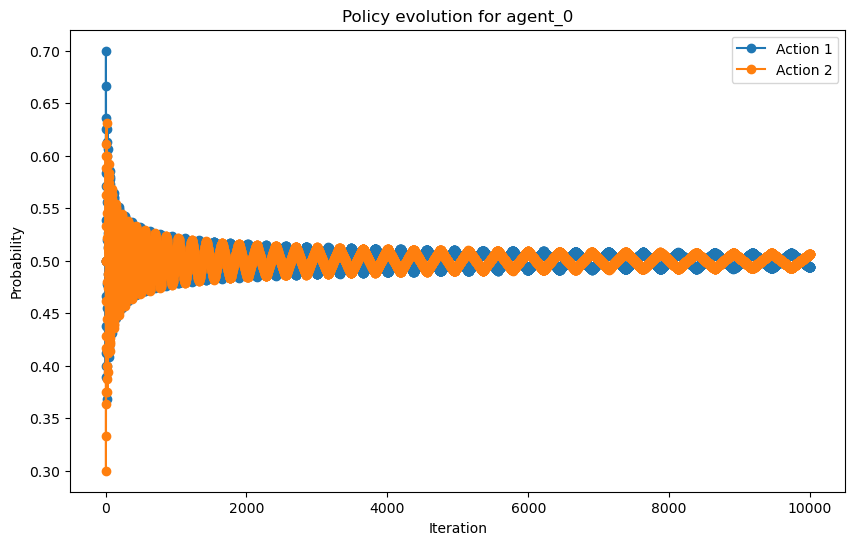

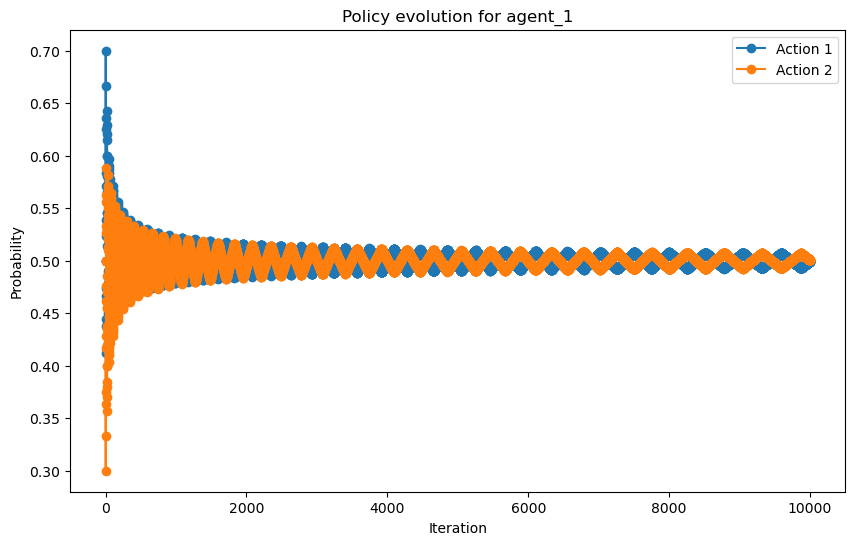

In [13]:
import matplotlib.pyplot as plt
import numpy as np

agents = g.agents
game = g
num_iterations = 10000
rm_agents = {agent: FictitiousPlay(game=game, agent=agent) for agent in agents}

policies = {agent: [] for agent in agents}
for _ in range(num_iterations):
    # Elegir acciones de los agentes
    actions = {agent: rm_agents[agent].action() for agent in agents}
    
    # Ejecutar un paso en el entorno
    game.step(actions)
    
    # Guardar la política aprendida en cada iteración
    for agent in agents:
        policies[agent].append(rm_agents[agent].policy().copy())

# Convertir las listas en arrays de NumPy para facilitar la manipulación
for agent in policies:
    policies[agent] = np.array(policies[agent])


# Graficar la evolución de las políticas de cada agente
for agent, policy_matrix in policies.items():
    plt.figure(figsize=(10, 6))

    plt.plot(range(num_iterations), policy_matrix[:, 0], label='Action 1', marker='o')
    plt.plot(range(num_iterations), policy_matrix[:, 1], label='Action 2', marker='o')

    plt.xlabel('Iteration')
    plt.ylabel('Probability')
    plt.title(f'Policy evolution for {agent}')
    plt.legend()
    plt.show()

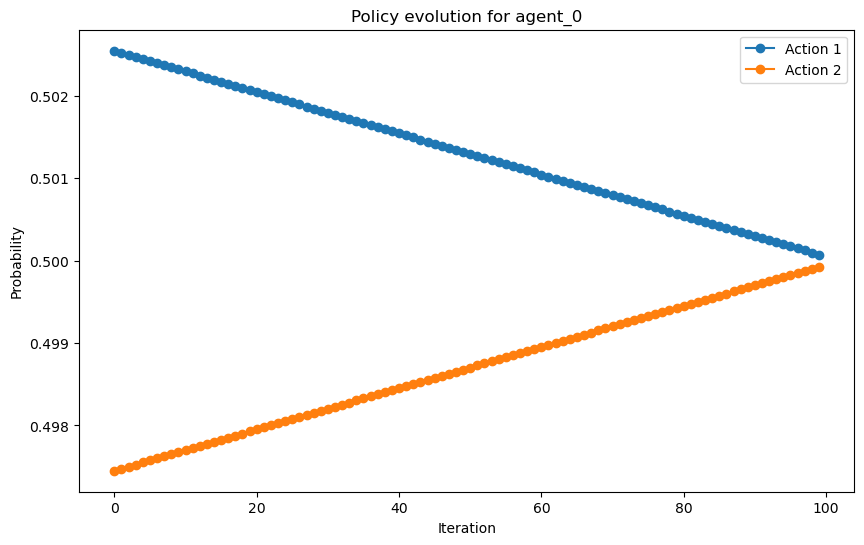

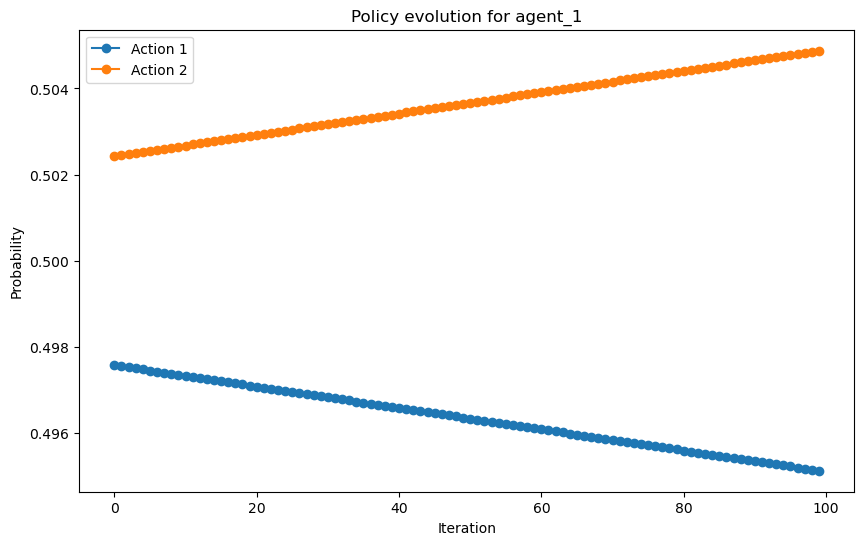

In [16]:
import matplotlib.pyplot as plt
import numpy as np

agents = g.agents
game = g
game.reset()
num_iterations = 100
mix_agents = {agents[0]: RegretMatching(game=game, agent=agent, initial=np.array([0.9, 0.1])),
              agents[1]: FictitiousPlay(game=game, agent=agent)}

policies = {agent: [] for agent in agents}
for _ in range(num_iterations):
    # Elegir acciones de los agentes
    actions = {agent: rm_agents[agent].action() for agent in agents}
    
    # Ejecutar un paso en el entorno
    game.step(actions)
    
    # Guardar la política aprendida en cada iteración
    for agent in agents:
        policies[agent].append(rm_agents[agent].policy().copy())

# Convertir las listas en arrays de NumPy para facilitar la manipulación
for agent in policies:
    policies[agent] = np.array(policies[agent])


# Graficar la evolución de las políticas de cada agente
for agent, policy_matrix in policies.items():
    plt.figure(figsize=(10, 6))

    plt.plot(range(num_iterations), policy_matrix[:, 0], label='Action 1', marker='o')
    plt.plot(range(num_iterations), policy_matrix[:, 1], label='Action 2', marker='o')

    plt.xlabel('Iteration')
    plt.ylabel('Probability')
    plt.title(f'Policy evolution for {agent}')
    plt.legend()
    plt.show()

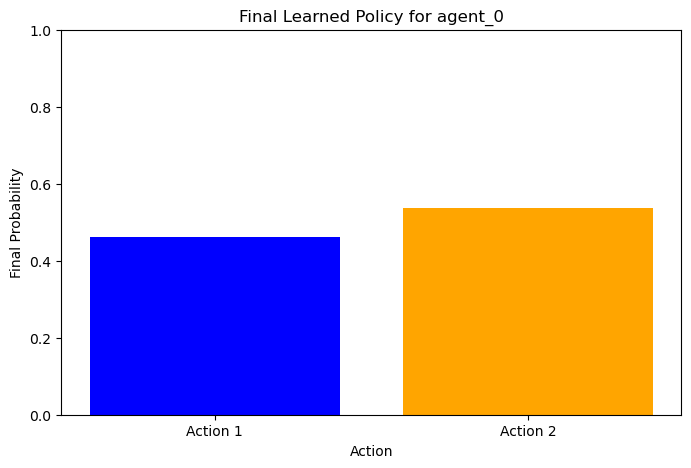

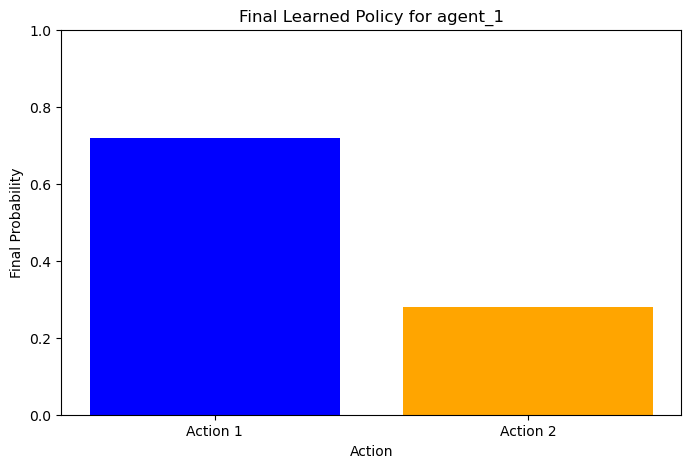

In [7]:
for agent, policy_matrix in policies.items():
    plt.figure(figsize=(8, 5))

    final_policy = policy_matrix[-1]  # Última iteración

    plt.bar(["Action 1", "Action 2"], final_policy, color=['blue', 'orange'])
    plt.ylim(0, 1)

    plt.xlabel('Action')
    plt.ylabel('Final Probability')
    plt.title(f'Final Learned Policy for {agent}')
    plt.show()


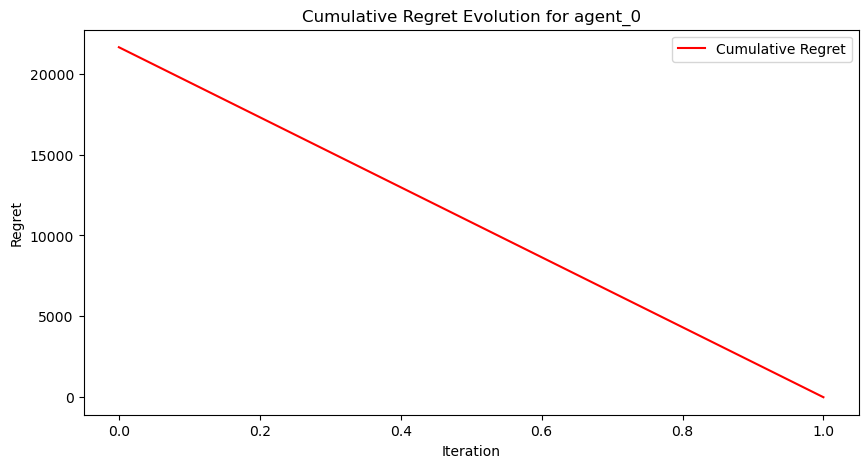

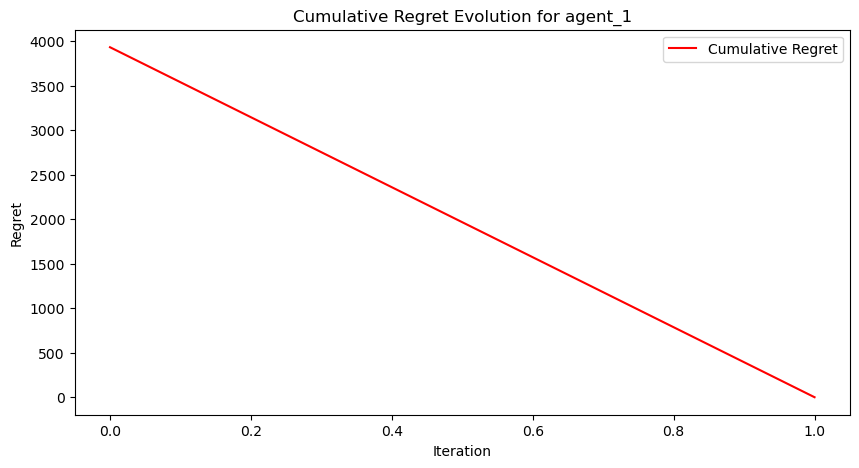

In [8]:
for agent, rm in rm_agents.items():
    regrets = np.maximum(rm.cum_regrets, 0)

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(regrets)), regrets, color="red", label="Cumulative Regret")
    plt.xlabel("Iteration")
    plt.ylabel("Regret")
    plt.title(f"Cumulative Regret Evolution for {agent}")
    plt.legend()
    plt.show()


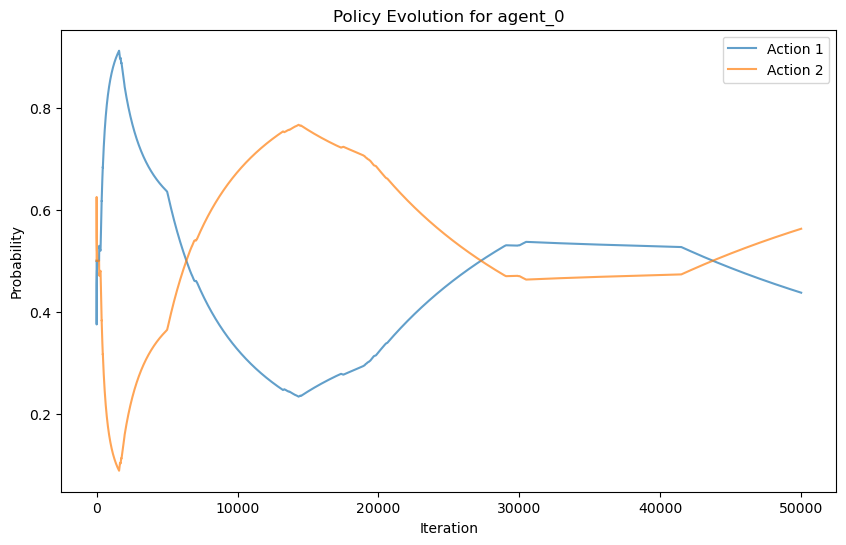

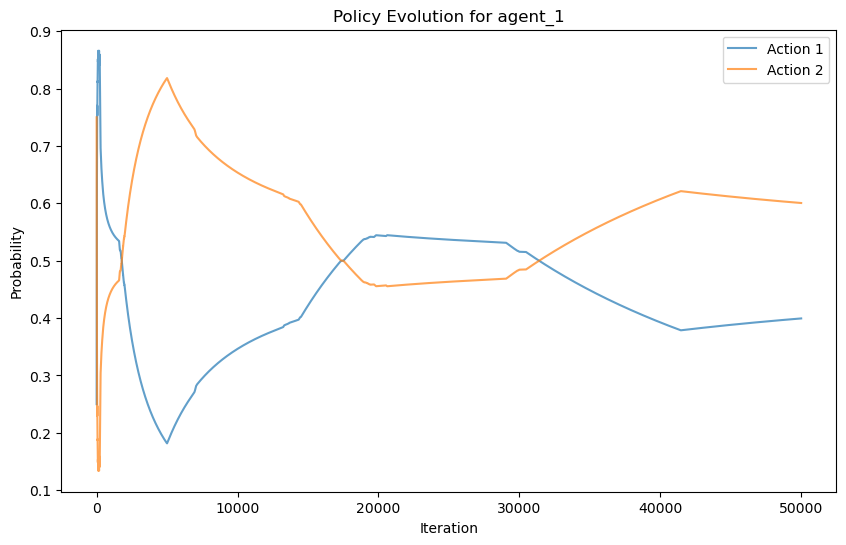

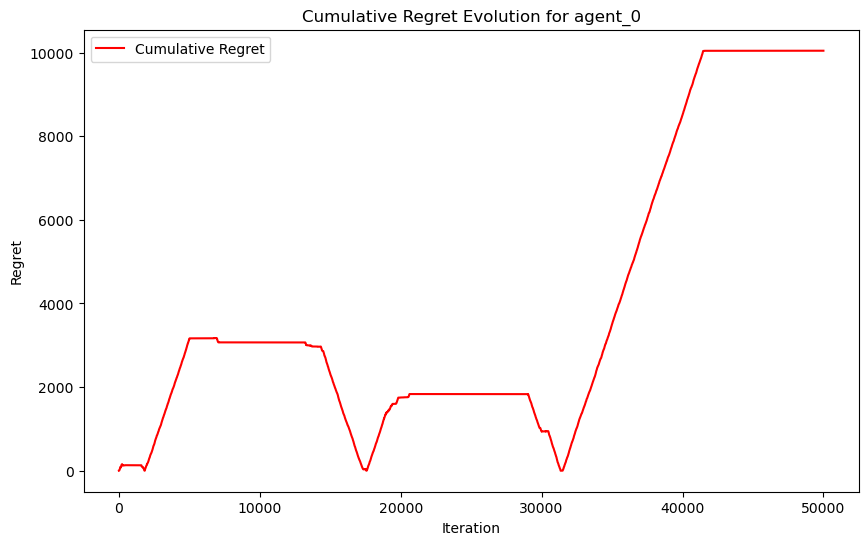

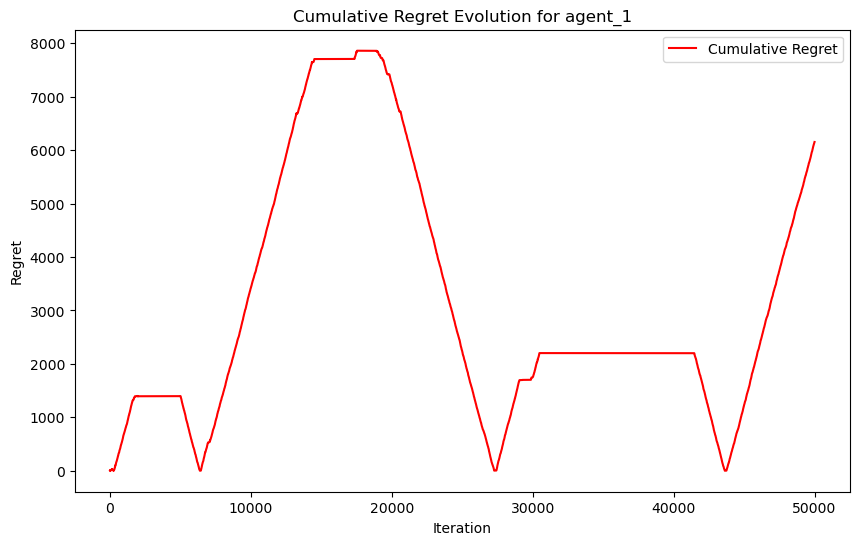

In [9]:
import matplotlib.pyplot as plt
import numpy as np

agents = g.agents
game = g
num_iterations = 50000
rm_agents = {agent: RegretMatching(game=game, agent=agent) for agent in agents}

policies = {agent: [] for agent in agents}
regrets = {agent: [] for agent in agents}  # Guardar regrets acumulados

for _ in range(num_iterations):
    # Elegir acciones de los agentes
    actions = {agent: rm_agents[agent].action() for agent in agents}
    
    # Ejecutar un paso en el entorno
    game.step(actions)
    
    # Guardar la política aprendida en cada iteración
    for agent in agents:
        policies[agent].append(rm_agents[agent].policy().copy())
        regrets[agent].append(np.sum(np.maximum(rm_agents[agent].cum_regrets, 0)))  # Acumulamos regret positivo

# Convertir las listas en arrays de NumPy para facilitar la manipulación
for agent in policies:
    policies[agent] = np.array(policies[agent])
    regrets[agent] = np.array(regrets[agent])

# 📈 Graficar la evolución de las políticas de cada agente
for agent, policy_matrix in policies.items():
    plt.figure(figsize=(10, 6))
    
    plt.plot(range(num_iterations), policy_matrix[:, 0], label='Action 1', alpha=0.7)
    plt.plot(range(num_iterations), policy_matrix[:, 1], label='Action 2', alpha=0.7)

    plt.xlabel('Iteration')
    plt.ylabel('Probability')
    plt.title(f'Policy Evolution for {agent}')
    plt.legend()
    plt.show()

# 📉 Graficar la evolución del regret acumulado
for agent, regret_values in regrets.items():
    plt.figure(figsize=(10, 6))
    
    plt.plot(range(num_iterations), regret_values, color="red", label="Cumulative Regret")
    
    plt.xlabel("Iteration")
    plt.ylabel("Regret")
    plt.title(f"Cumulative Regret Evolution for {agent}")
    plt.legend()
    plt.show()
